In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
df = pd.read_csv('Concrete_Data - Sheet1.csv')


In [45]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :\n", df.isnull().sum())

Valeurs manquantes :
 Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64


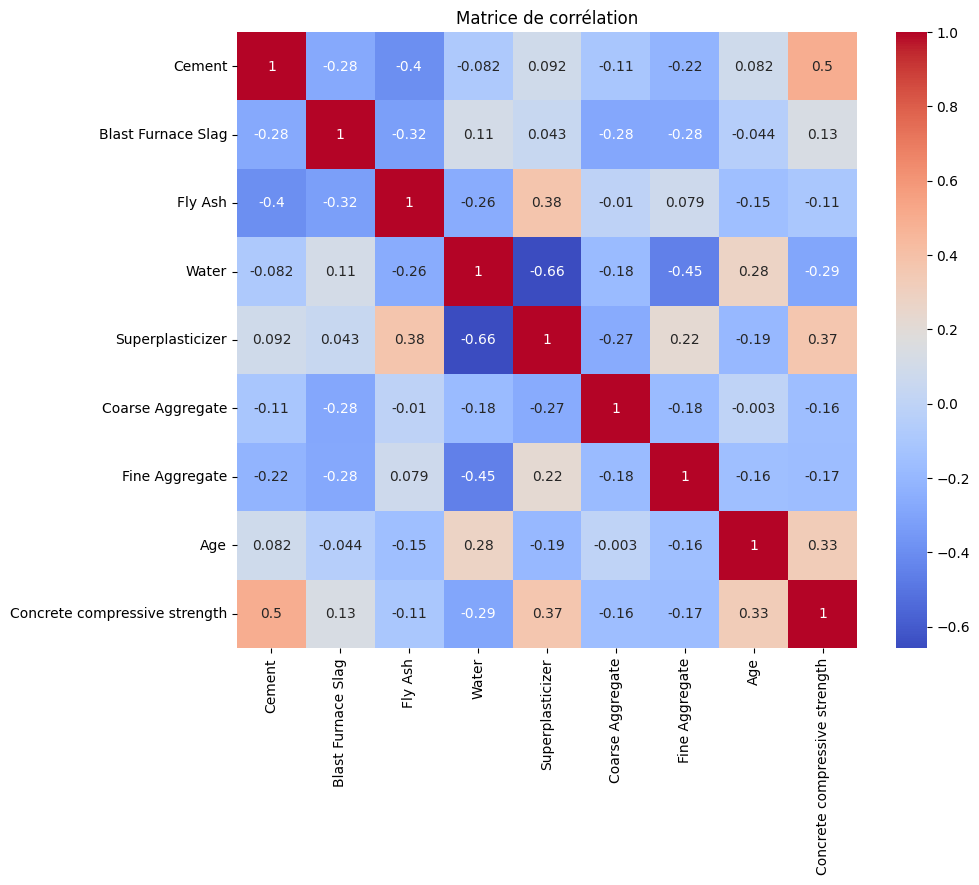

In [46]:
# Visualiser les corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()



In [47]:
# Séparer les features et la cible
X = df.drop(columns=['Concrete compressive strength'])
y = df['Concrete compressive strength']


In [48]:
# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Autoencoder Definition
encoding_dim = 5  # Latent space dimension
input_dim = X_train_scaled.shape[1]  # Original feature dimension (8)

input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)  # Correcting this line

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [51]:
# Entraînement de l'autoencodeur
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/50


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2950 - val_loss: 1.1735
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1871 - val_loss: 1.0897
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0469 - val_loss: 1.0133
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0324 - val_loss: 0.9406
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9533 - val_loss: 0.8759
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9181 - val_loss: 0.8199
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8125 - val_loss: 0.7739
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7754 - val_loss: 0.7381
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7320 - val_loss: 0.7105
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7097 - val_loss: 0.6892
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6983 - val_loss: 0.6726
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6637 - val_loss: 0.6593


In [52]:
# Encodage des données existantes
encoder = keras.Model(inputs=input_layer, outputs=encoded)
encoded_data = encoder.predict(X_train_scaled)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [53]:
# Vérification des dimensions avant la génération de nouvelles données
print(f"Shape du dataset encodé : {encoded_data.shape}")

# Génération de nouvelles données en ajoutant du bruit
noise = np.random.normal(0, 0.1, encoded_data.shape)
generated_data = encoded_data + noise


Shape du dataset encodé : (824, 12)


In [54]:
import numpy as np

# Ajouter des colonnes de zéros si nécessaire (exemple si 8 features sont attendues)
expected_features = autoencoder.input_shape[1]  # Exemple: 8
current_features = generated_data.shape[1]  # 5 dans ton cas

if current_features < expected_features:
    padding = np.zeros((generated_data.shape[0], expected_features - current_features))
    generated_data = np.hstack((generated_data, padding))

print("Nouvelle shape de generated_data :", generated_data.shape)



Nouvelle shape de generated_data : (824, 12)


In [55]:
generated_data = np.squeeze(generated_data)  # Enlève les dimensions inutiles
print("Nouvelle shape :", generated_data.shape)  # Doit être (824, 5)



Nouvelle shape : (824, 12)


In [56]:
import numpy as np

expected_features = autoencoder.input_shape[1]  # Exemple: 8
current_features = generated_data.shape[1]  # 5 dans ton cas

if current_features < expected_features:
    padding = np.zeros((generated_data.shape[0], expected_features - current_features))
    generated_data = np.hstack((generated_data, padding))

print("Nouvelle shape :", generated_data.shape)
generated_output = autoencoder.predict(generated_data)


Nouvelle shape : (824, 12)


ValueError: Input 0 of layer "functional_7" is incompatible with the layer: expected shape=(None, 8), found shape=(32, 12)

In [ ]:
# Création d'un nouveau dataset
new_df = pd.DataFrame(generated_data, columns=X.columns)
new_df['Concrete compressive strength'] = y_train.values  # Correction du nom

# Vérification des données générées
display(new_df.head())



,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1.319617,5.635197,0.776667,4.312204,-0.022305,0.0,0.0,0.0,27.68
1,4.707639,4.749753,2.666338,0.849888,5.031874,0.0,0.0,0.0,62.05
2,1.965750,5.413797,2.717855,-0.077985,0.176445,0.0,0.0,0.0,23.80
3,2.638138,2.301414,3.844788,5.069655,3.072155,0.0,0.0,0.0,33.40
4,0.207498,5.734771,3.182329,1.692900,0.224414,0.0,0.0,0.0,7.40


In [ ]:
# Entraînement d'un modèle de prédiction sur les nouvelles données
X_new = new_df.drop(columns=['Concrete compressive strength'])
y_new = new_df['Concrete compressive strength']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)


In [ ]:
# Définition du modèle de prédiction
model = keras.Sequential([
    
    layers.Dense(64, activation='relu', input_shape=(X_train_new_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Entraînement du modèle
model.fit(X_train_new_scaled, y_train_new, epochs=50, batch_size=16, validation_data=(X_test_new_scaled, y_test_new))

# Prédictions
y_pred_new = model.predict(X_test_new_scaled)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1445.7268 - mae: 34.1578 - val_loss: 1230.5717 - val_mae: 30.9222
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1248.4685 - mae: 31.2372 - val_loss: 804.2079 - val_mae: 23.5694
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 797.8585 - mae: 23.1745 - val_loss: 348.2579 - val_mae: 14.7390
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 373.5936 - mae: 14.9293 - val_loss: 213.2757 - val_mae: 11.8605
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 231.9756 - mae: 12.2437 - val_loss: 205.9302 - val_mae: 11.7438
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230.7698 - mae: 12.0660 - val_loss: 204.4353 - val_mae: 11.6770
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206.6826 - mae: 11.4943 - val_loss: 197.5202 - val_mae: 11.4771
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 193.5351 - mae: 11.2062 - val_loss: 195.0812 - val_mae: 11.3844
Epoch 9/50
42/42 ━━━━

MAE: 9.71
MSE: 142.72
RMSE: 11.95
R² Score: 0.49


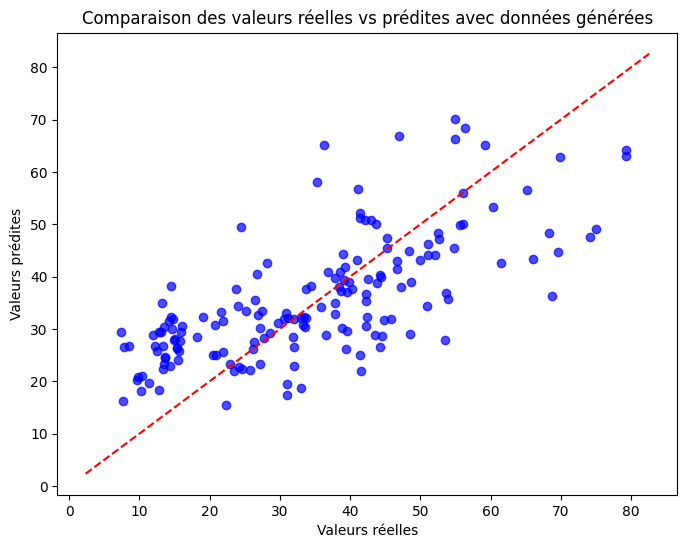

In [ ]:
# Évaluation du modèle
mae_new = mean_absolute_error(y_test_new, y_pred_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"MAE: {mae_new:.2f}")
print(f"MSE: {mse_new:.2f}")
print(f"RMSE: {rmse_new:.2f}")
print(f"R² Score: {r2_new:.2f}")

# Affichage des résultats
plt.figure(figsize=(8, 6))
plt.scatter(y_test_new, y_pred_new, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison des valeurs réelles vs prédites avec données générées")
plt.show()
